In [16]:
#total lines146,metrics_list:['cuInit', 'cuMemAlloc', 'cuMemFree', 'cuMemcpyH2D']
#file format: name:xxx, start:xxx, burst:xxxx, bytes:xxxx
file1 = open('/tmp/profiler/timeline.log', 'r')
lines = file1.readlines()
cnt = 0
metrics_dict = {}
first_ts = 0
cur_ts = 0
for line in lines:
    values = line.strip().split(",")
    name, start_time, burst, byt = [value.split(":")[1] for value in values]
    if cnt==0:
        first_ts = int(start_time)
        ts = 0
    else:
        cur_ts = int(start_time)
        ts = cur_ts - first_ts
    if name in metrics_dict:
        metrics_dict[name]['x'].append(ts)
        metrics_dict[name]['y'].append(int(burst))
    else:
        metrics_dict[name] = {}
        print("metrics:{}".format(name))
        metrics_dict[name]['x'] = [ts]
        metrics_dict[name]['y'] = [int(burst)]
    cnt += 1
file1.close()
print("total line: {}, total time span {} ms".format(cnt, (cur_ts-first_ts)/1e6))
print("start time {} ns, end time {} ns".format(first_ts, cur_ts))


metrics:cuInit
metrics:cuMemAlloc
metrics:cuMemFree
metrics:cuMemcpyH2D
total line: 146, total time span 38147.974039 ms
start time 1663019005279093.8 us, end time 1663019043427067.8 us
start time 1663019005279093636 ns, end time 1663019043427067675 ns


total step 241, total duration 19471.132928 ms, plot first 20 step duration
obseration, first step takes longer, every 10 step report something


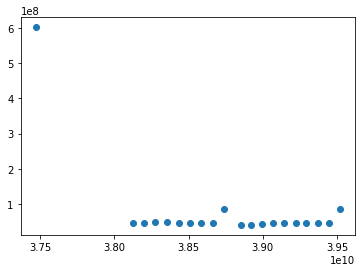

plot the complete training 250 steps, align with cuda intercept


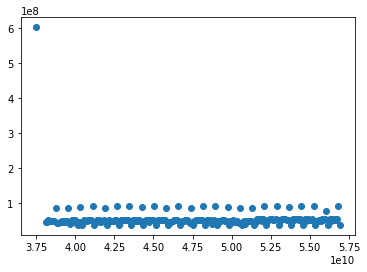

In [29]:
#step:1, start: 2022-09-12 14:44:02.749265, duation:602154
from datetime import datetime
file2 = open('/tmp/profiler/py_step.log', 'r')
lines = file2.readlines()
cnt = 0
step_x = []
step_y = []
for line in lines:
    values = line.strip().split(",")
    if len(values) != 3:
        continue
    start_time = values[1][7:]  #trim the prefix "start: "
    duration = values[2].split(":")[1]
    dt = datetime.strptime(start_time.strip(),'%Y-%m-%d %H:%M:%S.%f')
    ts = dt.timestamp()*1e9 - first_ts
    step_x.append(ts)
    step_y.append(int(duration)*1e3)
file2.close()
print("total step {}, total duration {} ms, plot first 20 step duration".format(len(step_x), (step_x[-1]-step_x[0])/1e6))
print("obseration, first step takes longer, every 10 step report something")
import matplotlib.pyplot as plt
plt.scatter(step_x[:20],step_y[:20])
plt.show()
print("plot the complete training 250 steps, align with cuda intercept")
plt.scatter(step_x,step_y)
plt.show()

cuInit


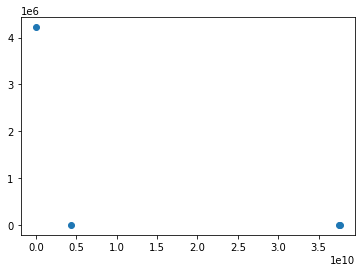

cuMemAlloc


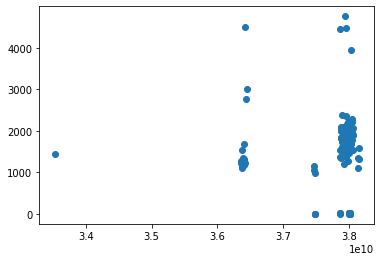

cuMemFree


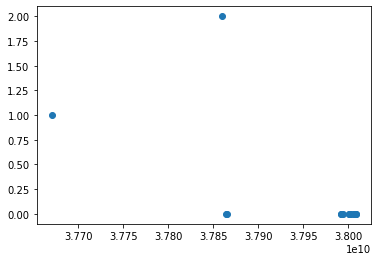

cuMemcpyH2D


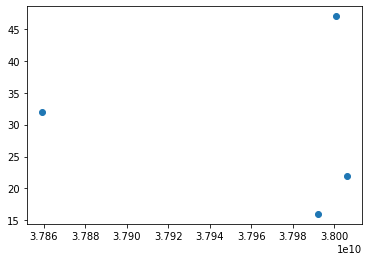

In [27]:
# plot metrics_dict
for k in metrics_dict:
    v = metrics_dict[k]
    print(k)
    plt.scatter(v['x'],v['y'])
    plt.show()